<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Neural Networks: Keras and Tensorflow
</p>
</div>

Data Science Cohort Live NYC July 2022
<p>Phase 4: Topic 40</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits, load_sample_images

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
    
%load_ext autoreload
%autoreload 2

#### Neural Networks: Packages

When manually implementing:

- have to keep track of forward and backwards propagation for each layer:
    - equations and updates depends on specific layer activations
- manage caching updates to gradients and weights/activations appropriately

**Deep Learning frameworks take care of this for us**

In addition:

- efficient matrix math for speedup.
- use variants of gradient descent that are **much** faster/better.

Major frameworks:

<img src = "Images/kerastf.png" >
<center> Keras: high level API of Tensorflow. </center>

- Keras: apt for quickly building/trying neural network architectures with standard layers/optimizers. Still build complex networks.
- Tensorflow: for building more customized networks and more control of optimization.

<center><img src = "Images/pytorch.png" >
More customizable than Keras. More pythonic than base Tensorflow. Nice functionalities for NLP. </center>


We will use Keras.

In [2]:
from tensorflow import keras

Keras has two major neural network construction frameworks:
- Sequential vs Functional API

Sequential API:

<img src = "Images/sequentialvsfunctional.png" >

<center>Apt for simpler feedforward network topologies.</center>

Functional API:

<center><img src = "Images/skipconnection.png" ></center>

Skip connections, branching, etc.


#### The Sequential API

Take in a simple and sufficiently interesting dataset:

- demonstrate non-trivial decision boundary
- show sequential API at work

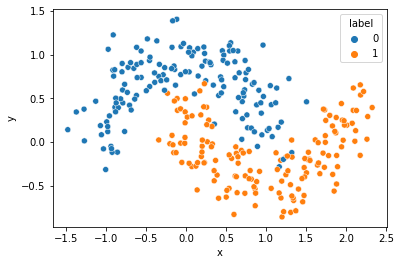

In [3]:
# generate two moons dataset
import seaborn as sns
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=10)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

sns.scatterplot(x = 'x', y = 'y', hue = 'label', data = df )
plt.show()

Import Sequential object: use Sequential API to construct models

In [4]:
from tensorflow.keras.models import Sequential

We want to start defining layers in the model:
    
The most common layer type in neural networks: 
- the **densely** connected layer

<img src = "Images/dense_layer.png" >

In [5]:
# creates densely connected layer object
from tensorflow.keras.layers import Dense

# defines input layer, not necessary in sequential API
# but nice for visualizing network later
from tensorflow.keras.layers import Input 

The Dense object constructor's basic arguments:
- units: number of nodes in layer
- activation: 'relu', 'tanh', 'sigmoid', 'softmax'


Defining the model: a shallow neural network

In [6]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu')) # one hidden layer
model.add(Dense(units=1, activation='sigmoid')) # output layer

Building/compiling the model:

- define objective function and optimizer
- define metric to evaluate train/validation
- build the network connections, weight matrices, initializes, etc.

In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

Some other loss functions:
- multiclass: 'categorical_crossentropy' for softmax
- regression: 'mean_squared_error'
- regression: 'mean_absolute_error'

The optimizer:

- Adam Optimizer: 
    - smoothens learning process 
    - uses adaptive learning rate.

A pretty good optimizer. Many other optimizers (NAdam, Adadelta).

#### Optimizers have hyperparameters.

- Can help in training speed up / finding minimum

model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy', 'AUC'])

In [9]:
from tensorflow.keras.optimizers import Adam

In [10]:
opt = Adam(learning_rate = 0.01, beta_1 = 0.9, beta_2 = 0.999 ) # typical parameters

In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])

Metrics: takes in list (calculates metrics in list at each epoch):

Regression:
- 'mae'
- 'mse'
- 'rmse'

Classification:
- 'accuracy'
- 'AUC'
- 'fmeasure'
etc.

Keras provides metrics callable as objects:
- more metrics available
- pass in arguments (probability threshold, etc.)
- build your own metrics.

See documentation for more information.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                150       
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


Train test split the data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

#### .fit() method

- batch_size = # of points you train on in given forward/back-prop loop

typical batch sizes: 1, 32, 64, 128, 256, 512

Batch size:

- Stochastic Gradient Descent: batch_size = 1
- Minibatch Gradient Descent: batch_size = $n_{batch} < N_{train}$
- Batch Gradient Descent: full training set fed in on each lforward/back-prop loop

The intuition behind SGD, mini-batch:

SGD: single point $i$
$$ \textbf{w}_{k+1} = \textbf{w}_k - \alpha \nabla_{\textbf{w}}L(y_i, \hat{y}_i) $$

- Using a single point may not be good enough to sample loss function and its gradient. Noisy descent. 
- Can go wrong direction.
- Effectively looping one point at a time. Computationally inefficient.

Mini-batch gives you average of gradient over a sample of training set: often good enough!

$$ \textbf{w}_{k+1} = \textbf{w}_k - \frac{\alpha}{n_{batch}} \sum_{i=1}^{n_{batch}} \nabla_{\textbf{w}}L(y_i, \hat{y}_i) $$

- Substantially smaller amount of data fed through: still make progress.

Batch gradient descent: all training data.
    
- Will always lower objective on training.
- But depending on dataset:
- manipulating huge matrices just to make one gradient descent step.

<img src = "Images/gradient_descent.png" >

#### Epochs
- Number of times to cycle through **entire** training data.
- Implies number of forward/backprop cycles is: $$ \frac{N_{train}}{n_{batch}} \times \text{epochs} $$

Can train through all epochs defined or:

**Earlystopping callback on training**

- Monitor training loss and set improvement threshold (min_delta)
- Waiting certain number of epochs if no improvements (patience).
- Terminate training.

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
trainCallback = EarlyStopping(monitor='loss', min_delta = 1e-6, patience = 5)

**Validation set**

- can feed an external validation set 
- hold out a fraction of training set for validation
- evaluates on train and validation at each epoch

In [15]:
history = model.fit(X_train, y_train, epochs = 10000, batch_size = 32, validation_split = 0.2, callbacks=[trainCallback])

Epoch 1/10000
6/6 [==============================] - 1s 71ms/step - loss: 0.6697 - accuracy: 0.6823 - auc: 0.8283 - val_loss: 0.6529 - val_accuracy: 0.7708 - val_auc: 0.8821
Epoch 2/10000
6/6 [==============================] - 0s 9ms/step - loss: 0.6484 - accuracy: 0.7552 - auc: 0.8974 - val_loss: 0.6341 - val_accuracy: 0.7917 - val_auc: 0.9036
Epoch 3/10000
6/6 [==============================] - 0s 9ms/step - loss: 0.6285 - accuracy: 0.7812 - auc: 0.9138 - val_loss: 0.6159 - val_accuracy: 0.7917 - val_auc: 0.9161
Epoch 4/10000
6/6 [==============================] - 0s 9ms/step - loss: 0.6092 - accuracy: 0.7969 - auc: 0.9220 - val_loss: 0.5991 - val_accuracy: 0.7708 - val_auc: 0.9196
Epoch 5/10000
6/6 [==============================] - 0s 9ms/step - loss: 0.5909 - accuracy: 0.8021 - auc: 0.9242 - val_loss: 0.5829 - val_accuracy: 0.7500 - val_auc: 0.9214
Epoch 6/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.5734 - accuracy: 0.8021 - auc: 0.9275 - val_loss: 0.5673 - 

6/6 [==============================] - 0s 6ms/step - loss: 0.3159 - accuracy: 0.8698 - auc: 0.9448 - val_loss: 0.3311 - val_accuracy: 0.8333 - val_auc: 0.9563
Epoch 49/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.3150 - accuracy: 0.8698 - auc: 0.9451 - val_loss: 0.3290 - val_accuracy: 0.8333 - val_auc: 0.9554
Epoch 50/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.3139 - accuracy: 0.8698 - auc: 0.9453 - val_loss: 0.3273 - val_accuracy: 0.8333 - val_auc: 0.9563
Epoch 51/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.3132 - accuracy: 0.8698 - auc: 0.9455 - val_loss: 0.3253 - val_accuracy: 0.8333 - val_auc: 0.9571
Epoch 52/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.3125 - accuracy: 0.8698 - auc: 0.9460 - val_loss: 0.3250 - val_accuracy: 0.8333 - val_auc: 0.9598
Epoch 53/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.3113 - accuracy: 0.8698 - auc: 0.9467 - val_loss: 0.3236 - val_accura

6/6 [==============================] - 0s 7ms/step - loss: 0.2923 - accuracy: 0.8802 - auc: 0.9521 - val_loss: 0.2826 - val_accuracy: 0.8750 - val_auc: 0.9714
Epoch 96/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.2921 - accuracy: 0.8750 - auc: 0.9523 - val_loss: 0.2824 - val_accuracy: 0.8750 - val_auc: 0.9714
Epoch 97/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.2916 - accuracy: 0.8750 - auc: 0.9524 - val_loss: 0.2809 - val_accuracy: 0.8750 - val_auc: 0.9714
Epoch 98/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.2912 - accuracy: 0.8802 - auc: 0.9523 - val_loss: 0.2796 - val_accuracy: 0.8750 - val_auc: 0.9714
Epoch 99/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.2908 - accuracy: 0.8802 - auc: 0.9526 - val_loss: 0.2792 - val_accuracy: 0.8750 - val_auc: 0.9714
Epoch 100/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.2905 - accuracy: 0.8802 - auc: 0.9529 - val_loss: 0.2787 - val_accur

Epoch 142/10000
6/6 [==============================] - 0s 9ms/step - loss: 0.2763 - accuracy: 0.8750 - auc: 0.9570 - val_loss: 0.2591 - val_accuracy: 0.8750 - val_auc: 0.9777
Epoch 143/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2760 - accuracy: 0.8750 - auc: 0.9567 - val_loss: 0.2585 - val_accuracy: 0.8750 - val_auc: 0.9777
Epoch 144/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.2756 - accuracy: 0.8750 - auc: 0.9567 - val_loss: 0.2584 - val_accuracy: 0.8750 - val_auc: 0.9777
Epoch 145/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.2752 - accuracy: 0.8750 - auc: 0.9569 - val_loss: 0.2580 - val_accuracy: 0.8750 - val_auc: 0.9777
Epoch 146/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.2748 - accuracy: 0.8750 - auc: 0.9570 - val_loss: 0.2574 - val_accuracy: 0.8750 - val_auc: 0.9795
Epoch 147/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.2746 - accuracy: 0.8802 - auc: 0.9573 - val_loss

Epoch 189/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.2614 - accuracy: 0.8802 - auc: 0.9607 - val_loss: 0.2421 - val_accuracy: 0.8750 - val_auc: 0.9804
Epoch 190/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.2611 - accuracy: 0.8854 - auc: 0.9607 - val_loss: 0.2423 - val_accuracy: 0.8750 - val_auc: 0.9804
Epoch 191/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2608 - accuracy: 0.8802 - auc: 0.9609 - val_loss: 0.2420 - val_accuracy: 0.8750 - val_auc: 0.9804
Epoch 192/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2603 - accuracy: 0.8854 - auc: 0.9609 - val_loss: 0.2414 - val_accuracy: 0.8750 - val_auc: 0.9804
Epoch 193/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2601 - accuracy: 0.8854 - auc: 0.9611 - val_loss: 0.2412 - val_accuracy: 0.8750 - val_auc: 0.9804
Epoch 194/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.2597 - accuracy: 0.8802 - auc: 0.9611 - val_loss

Epoch 236/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.2448 - accuracy: 0.8906 - auc: 0.9666 - val_loss: 0.2263 - val_accuracy: 0.8958 - val_auc: 0.9821
Epoch 237/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.2442 - accuracy: 0.8906 - auc: 0.9668 - val_loss: 0.2261 - val_accuracy: 0.8958 - val_auc: 0.9821
Epoch 238/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.2440 - accuracy: 0.8906 - auc: 0.9668 - val_loss: 0.2261 - val_accuracy: 0.8958 - val_auc: 0.9821
Epoch 239/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.2436 - accuracy: 0.8906 - auc: 0.9668 - val_loss: 0.2252 - val_accuracy: 0.8958 - val_auc: 0.9821
Epoch 240/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.2432 - accuracy: 0.8906 - auc: 0.9669 - val_loss: 0.2247 - val_accuracy: 0.8958 - val_auc: 0.9821
Epoch 241/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.2429 - accuracy: 0.8906 - auc: 0.9669 - val_loss

Epoch 283/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.2261 - accuracy: 0.8906 - auc: 0.9708 - val_loss: 0.2099 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 284/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.2257 - accuracy: 0.8906 - auc: 0.9710 - val_loss: 0.2090 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 285/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.2255 - accuracy: 0.8906 - auc: 0.9713 - val_loss: 0.2076 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 286/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2253 - accuracy: 0.8906 - auc: 0.9711 - val_loss: 0.2086 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 287/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.2246 - accuracy: 0.8906 - auc: 0.9715 - val_loss: 0.2076 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 288/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.2239 - accuracy: 0.8906 - auc: 0.9720 - val_loss

Epoch 330/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1998 - accuracy: 0.8906 - auc: 0.9780 - val_loss: 0.1816 - val_accuracy: 0.9375 - val_auc: 0.9884
Epoch 331/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1991 - accuracy: 0.8906 - auc: 0.9783 - val_loss: 0.1811 - val_accuracy: 0.9375 - val_auc: 0.9893
Epoch 332/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1984 - accuracy: 0.8906 - auc: 0.9782 - val_loss: 0.1796 - val_accuracy: 0.9375 - val_auc: 0.9893
Epoch 333/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1980 - accuracy: 0.8906 - auc: 0.9784 - val_loss: 0.1796 - val_accuracy: 0.9375 - val_auc: 0.9893
Epoch 334/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1970 - accuracy: 0.8906 - auc: 0.9788 - val_loss: 0.1786 - val_accuracy: 0.9375 - val_auc: 0.9893
Epoch 335/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1965 - accuracy: 0.8958 - auc: 0.9790 - val_loss

Epoch 377/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.1721 - accuracy: 0.9323 - auc: 0.9852 - val_loss: 0.1581 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 378/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.1716 - accuracy: 0.9323 - auc: 0.9852 - val_loss: 0.1577 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 379/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1711 - accuracy: 0.9323 - auc: 0.9854 - val_loss: 0.1578 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 380/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.1706 - accuracy: 0.9323 - auc: 0.9855 - val_loss: 0.1582 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 381/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1700 - accuracy: 0.9323 - auc: 0.9858 - val_loss: 0.1579 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 382/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.1695 - accuracy: 0.9323 - auc: 0.9858 - val_loss

Epoch 424/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1509 - accuracy: 0.9531 - auc: 0.9901 - val_loss: 0.1417 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 425/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1506 - accuracy: 0.9479 - auc: 0.9901 - val_loss: 0.1421 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 426/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1503 - accuracy: 0.9531 - auc: 0.9901 - val_loss: 0.1420 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 427/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1497 - accuracy: 0.9531 - auc: 0.9902 - val_loss: 0.1412 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 428/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1493 - accuracy: 0.9531 - auc: 0.9902 - val_loss: 0.1407 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 429/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1489 - accuracy: 0.9531 - auc: 0.9902 - val_loss

Epoch 471/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1339 - accuracy: 0.9531 - auc: 0.9925 - val_loss: 0.1305 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 472/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1336 - accuracy: 0.9531 - auc: 0.9925 - val_loss: 0.1299 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 473/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.1333 - accuracy: 0.9583 - auc: 0.9925 - val_loss: 0.1299 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 474/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1329 - accuracy: 0.9583 - auc: 0.9926 - val_loss: 0.1295 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 475/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1328 - accuracy: 0.9583 - auc: 0.9926 - val_loss: 0.1298 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 476/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1322 - accuracy: 0.9583 - auc: 0.9927 - val_loss

Epoch 518/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1201 - accuracy: 0.9583 - auc: 0.9941 - val_loss: 0.1208 - val_accuracy: 0.9792 - val_auc: 0.9955
Epoch 519/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.1198 - accuracy: 0.9583 - auc: 0.9942 - val_loss: 0.1208 - val_accuracy: 0.9792 - val_auc: 0.9955
Epoch 520/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1197 - accuracy: 0.9583 - auc: 0.9942 - val_loss: 0.1209 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 521/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.1193 - accuracy: 0.9583 - auc: 0.9942 - val_loss: 0.1206 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 522/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1193 - accuracy: 0.9583 - auc: 0.9942 - val_loss: 0.1199 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 523/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1188 - accuracy: 0.9583 - auc: 0.9943 - val_loss

Epoch 565/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.1090 - accuracy: 0.9688 - auc: 0.9953 - val_loss: 0.1139 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 566/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1089 - accuracy: 0.9688 - auc: 0.9953 - val_loss: 0.1134 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 567/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1085 - accuracy: 0.9688 - auc: 0.9954 - val_loss: 0.1138 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 568/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1083 - accuracy: 0.9688 - auc: 0.9954 - val_loss: 0.1138 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 569/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1081 - accuracy: 0.9688 - auc: 0.9954 - val_loss: 0.1138 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 570/10000
6/6 [==============================] - 0s 5ms/step - loss: 0.1079 - accuracy: 0.9688 - auc: 0.9955 - val_loss

Epoch 612/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.1000 - accuracy: 0.9740 - auc: 0.9964 - val_loss: 0.1094 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 613/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0998 - accuracy: 0.9740 - auc: 0.9964 - val_loss: 0.1091 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 614/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0997 - accuracy: 0.9740 - auc: 0.9964 - val_loss: 0.1084 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 615/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0995 - accuracy: 0.9740 - auc: 0.9964 - val_loss: 0.1088 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 616/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0993 - accuracy: 0.9740 - auc: 0.9964 - val_loss: 0.1089 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 617/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0992 - accuracy: 0.9740 - auc: 0.9964 - val_loss

Epoch 659/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0928 - accuracy: 0.9688 - auc: 0.9968 - val_loss: 0.1057 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 660/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0927 - accuracy: 0.9688 - auc: 0.9969 - val_loss: 0.1061 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 661/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0926 - accuracy: 0.9688 - auc: 0.9969 - val_loss: 0.1053 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 662/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0924 - accuracy: 0.9688 - auc: 0.9969 - val_loss: 0.1054 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 663/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0922 - accuracy: 0.9688 - auc: 0.9970 - val_loss: 0.1053 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 664/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0921 - accuracy: 0.9688 - auc: 0.9970 - val_loss

Epoch 706/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0871 - accuracy: 0.9688 - auc: 0.9972 - val_loss: 0.1029 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 707/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0870 - accuracy: 0.9688 - auc: 0.9972 - val_loss: 0.1032 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 708/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0869 - accuracy: 0.9688 - auc: 0.9972 - val_loss: 0.1026 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 709/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0867 - accuracy: 0.9688 - auc: 0.9972 - val_loss: 0.1029 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 710/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0866 - accuracy: 0.9688 - auc: 0.9972 - val_loss: 0.1033 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 711/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0866 - accuracy: 0.9688 - auc: 0.9972 - val_loss

Epoch 753/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0824 - accuracy: 0.9688 - auc: 0.9973 - val_loss: 0.1008 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 754/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0824 - accuracy: 0.9688 - auc: 0.9973 - val_loss: 0.1015 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 755/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0822 - accuracy: 0.9688 - auc: 0.9973 - val_loss: 0.1014 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 756/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0823 - accuracy: 0.9688 - auc: 0.9973 - val_loss: 0.1015 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 757/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0821 - accuracy: 0.9688 - auc: 0.9973 - val_loss: 0.1011 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 758/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0820 - accuracy: 0.9688 - auc: 0.9973 - val_loss

Epoch 800/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.0787 - accuracy: 0.9688 - auc: 0.9974 - val_loss: 0.1006 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 801/10000
6/6 [==============================] - 0s 8ms/step - loss: 0.0787 - accuracy: 0.9688 - auc: 0.9975 - val_loss: 0.1016 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 802/10000
6/6 [==============================] - 0s 7ms/step - loss: 0.0784 - accuracy: 0.9688 - auc: 0.9975 - val_loss: 0.1012 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 803/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0784 - accuracy: 0.9688 - auc: 0.9976 - val_loss: 0.1012 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 804/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0782 - accuracy: 0.9688 - auc: 0.9976 - val_loss: 0.1009 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 805/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0786 - accuracy: 0.9688 - auc: 0.9975 - val_loss

Epoch 847/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0753 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0999 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 848/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0752 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.1007 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 849/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0751 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.1009 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 850/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0751 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.1012 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 851/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0749 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.1007 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 852/10000
6/6 [==============================] - 0s 6ms/step - loss: 0.0751 - accuracy: 0.9688 - auc: 0.9977 - val_loss

In [16]:
# predict method outputs probability of
# being class 1
y_proba = model.predict(X_test) 
y_proba[0:5]

2/2 [==============================] - 0s 2ms/step


array([[9.9984360e-01],
       [9.8641419e-01],
       [9.4076264e-01],
       [9.8898363e-01],
       [3.7078437e-06]], dtype=float32)

In [17]:
# getting class predictions
y_pred = (y_proba > 0.5).astype('int')
y_pred[0:5]

array([[1],
       [1],
       [1],
       [1],
       [0]])

In [18]:
_, test_accuracy, test_AUC = model.evaluate(X_test, y_test, verbose=0)
print(test_accuracy, test_AUC)

0.9666666388511658 0.9988776445388794


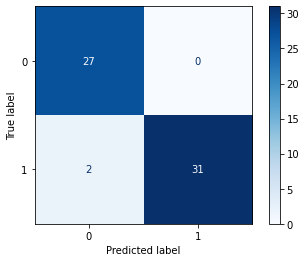

In [19]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

View decision boundary

80/80 [==============================] - 0s 1ms/step


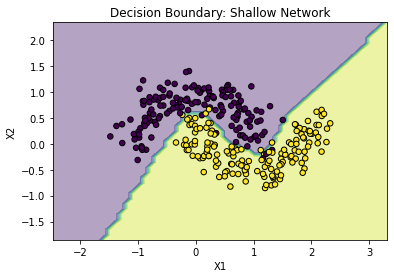

In [20]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots()

Z = (model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5).astype('int')
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(X[:, 0], X[:, 1], c = y, s=30, edgecolor="k")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Decision Boundary: Shallow Network')
plt.show()

The model object returns a history method:
- history attribute is a dictionary storing:
   - training/validation losses.
   - metrics on train/validation sets.

In [21]:
train_accuracy = history.history['loss']
validation_accuracy = history.history['val_loss']
train_history = pd.DataFrame(history.history)
train_history.index.name = 'epochs'
train_history.head()

,loss,accuracy,auc,val_loss,val_accuracy,val_auc
epochs,,,,,,
0,0.669741,0.682292,0.828297,0.652888,0.770833,0.882143
1,0.648386,0.755208,0.897404,0.634112,0.791667,0.903571
2,0.628515,0.781250,0.913821,0.615937,0.791667,0.916071
3,0.609223,0.796875,0.922003,0.599106,0.770833,0.919643
4,0.590930,0.802083,0.924185,0.582908,0.750000,0.921429


Plotting history:

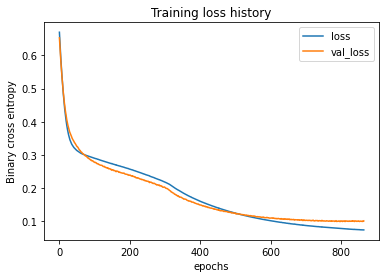

In [22]:
col_list = ['loss', 'val_loss']
train_history[col_list].plot()
plt.ylabel('Binary cross entropy')
plt.title('Training loss history')
plt.show()

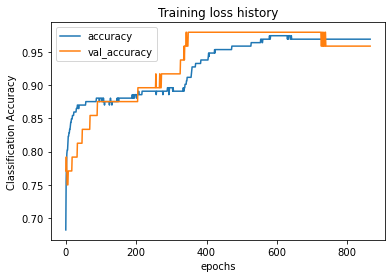

In [23]:
col_list = ['accuracy', 'val_accuracy']
train_history[col_list].plot()
plt.ylabel('Classification Accuracy')
plt.title('Training loss history')
plt.show()

#### Using neural networks to solve some harder problems

#### Image classificaton of hand-written digits

- The MNIST dataset: a classic benchmark for neural network image classification

In [24]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical # for target labels
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

In [25]:
# load in the data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


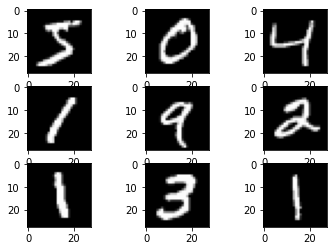

In [26]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
plt.show()

Good practice to normalize/standardize feature inputs:
- makes learning faster (optimization doesn't depend on variable scale)


<img src = "Images/normalize_nn.png" >

Another reason:
- keeping values small helps keeps weights stable

In [27]:
x_train = x_train/255 # normalization
x_test = x_test/255

# Keras requires multi-class labels to be one-hot encoded
y_tr_one_hot = to_categorical(y_train)
y_tt_one_hot = to_categorical(y_test)
y_tt_one_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Sequential model: add another hidden layer

- additional layer will help us learn more complex features
- note: we've added a few more units in first hidden layer as well.

In [28]:
model_images = Sequential()
model_images.add(Flatten(input_shape=(28, 28))) # flattens each 28x28 image into a vector
model_images.add(Dense(32, activation='relu'))
model_images.add(Dense(8, activation='relu'))
model_images.add(Dense(10, activation='softmax')) # number of units = number of target classes

In [29]:
model_images.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'] )

Let's train the model.

- Here we will use **validation** loss: stopping to prevent overfitting.

In [30]:
valcallback = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 2)

In [31]:
history_mnist = model_images.fit(x_train, y_tr_one_hot, epochs=100, batch_size= 32, validation_split = 0.2, 
                 callbacks = [trainCallback] )

Epoch 1/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5286 - accuracy: 0.8458 - val_loss: 0.2495 - val_accuracy: 0.9293
Epoch 2/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2326 - accuracy: 0.9342 - val_loss: 0.1974 - val_accuracy: 0.9441
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1867 - accuracy: 0.9465 - val_loss: 0.1838 - val_accuracy: 0.9468
Epoch 4/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1608 - accuracy: 0.9526 - val_loss: 0.1655 - val_accuracy: 0.9524
Epoch 5/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1411 - accuracy: 0.9585 - val_loss: 0.1575 - val_accuracy: 0.9559
Epoch 6/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1278 - accuracy: 0.9625 - val_loss: 0.1585 - val_accuracy: 0.9566
Epoch 7/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1167 - accuracy: 0.9650 - val_loss: 0.1502 - val_ac

1500/1500 [==============================] - 3s 2ms/step - loss: 0.0158 - accuracy: 0.9947 - val_loss: 0.2944 - val_accuracy: 0.9571
Epoch 58/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0136 - accuracy: 0.9956 - val_loss: 0.3046 - val_accuracy: 0.9582
Epoch 59/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.3085 - val_accuracy: 0.9588
Epoch 60/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.2988 - val_accuracy: 0.9577
Epoch 61/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0121 - accuracy: 0.9964 - val_loss: 0.3032 - val_accuracy: 0.9607
Epoch 62/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0155 - accuracy: 0.9947 - val_loss: 0.3011 - val_accuracy: 0.9593
Epoch 63/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0112 - accuracy: 0.9964 - val_loss: 0.3088 - val_accuracy

In [32]:
# probability for each class
y_proba = model_images.predict(x_test)
y_proba

313/313 [==============================] - 0s 1ms/step


array([[2.4049787e-15, 5.2676466e-22, 7.0827573e-11, ..., 9.9999666e-01,
        4.7967338e-25, 4.1970711e-09],
       [0.0000000e+00, 1.1963674e-17, 1.0000000e+00, ..., 0.0000000e+00,
        6.2792687e-15, 7.9478577e-38],
       [9.6602798e-20, 9.9987102e-01, 6.5991728e-08, ..., 5.2174987e-06,
        1.2202402e-04, 5.7479985e-09],
       ...,
       [3.0560768e-34, 3.0539957e-31, 5.1115935e-31, ..., 5.7792652e-22,
        9.6154435e-15, 2.7368919e-18],
       [1.0045269e-17, 3.8088621e-16, 5.9181923e-31, ..., 1.8095987e-25,
        1.0460938e-02, 5.3300308e-21],
       [2.8863713e-25, 0.0000000e+00, 1.1216771e-25, ..., 6.5463260e-27,
        2.8003360e-30, 0.0000000e+00]], dtype=float32)

In [33]:
model_images.evaluate(x_test, y_tt_one_hot, verbose = 0)

[0.36325985193252563, 0.9584000110626221]

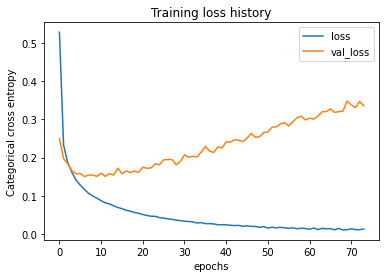

In [34]:
train_mnist_history = pd.DataFrame(history_mnist.history)
train_mnist_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_mnist_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()

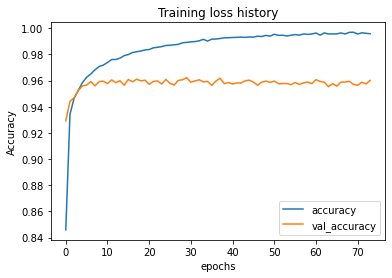

In [35]:
col_list = ['accuracy', 'val_accuracy']
train_mnist_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()

Clearly, some overfitting.

Getting the class predictions from softmax probabilities.

In [36]:
# argmax axis = -1 gets the column index of maximum probability for each row.
# column index corresponds to digit classes (numbers 0 -9)
predicted = np.argmax(y_proba, axis=-1)
predicted

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

Let's look at our classifier did on the test set in more detail.

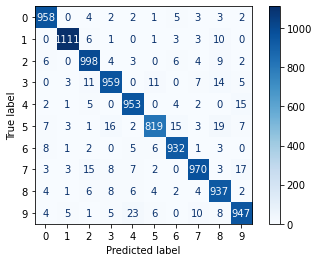

In [37]:
cm_digits = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_digits)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Not bad:
- but in the context of many tasks this is not yet a viable system.
- e.g., reading checks, etc

- Next steps: increasing network complexity / train longer but not overfitting
- getting better fitting and test-set generalization

<center><b>Network Regularization</b></center>